In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import seaborn as sns
from io import StringIO

In [98]:
uploaded = files.upload()

csv_string = next(iter(uploaded.values())).decode('utf-8')

from io import StringIO
df = pd.read_csv(StringIO(csv_string))

X = df.drop("Survived", axis=1)

Saving train.csv to train (19).csv


In [120]:
# Custom Scaler
def custom_standard_scaler(X):
    X = X.select_dtypes(include=[np.number])

    num_samples, num_features = X.shape

    scaled_X = np.zeros((num_samples, num_features))

    for i in range(num_features):
        feature_values = X.iloc[:, i]
        if not feature_values.isnull().all():
            mean = feature_values.mean()
            std = feature_values.std()
            scaled_X[:, i] = (feature_values - mean) / std
        else:
            scaled_X[:, i] = feature_values

    return scaled_X

In [109]:
X_scaled_custom = custom_standard_scaler(X)
X_scaled_custom

array([[-1.7291368 ,  0.82691282, -0.5300051 ,  0.43255043, -0.47340772,
        -0.50216314],
       [-1.7252511 , -1.56522783,  0.57143041,  0.43255043, -0.47340772,
         0.78640362],
       [-1.7213654 ,  0.82691282, -0.25464622, -0.47427882, -0.47340772,
        -0.48857985],
       ...,
       [ 1.7213654 ,  0.82691282,         nan,  0.43255043,  2.0078057 ,
        -0.1761643 ],
       [ 1.7252511 , -1.56522783, -0.25464622, -0.47427882, -0.47340772,
        -0.04435613],
       [ 1.7291368 ,  0.82691282,  0.1583921 , -0.47427882, -0.47340772,
        -0.49210144]])

In [119]:
# Parse the dataset for KNN
numeric_columns = X.select_dtypes(include=[np.number])
df_cleaned = numeric_columns.dropna()

y_cleaned = y[df_cleaned.index]

X_train, X_test, y_train, y_test = train_test_split(df_cleaned, y_cleaned, test_size=0.2, random_state=42)

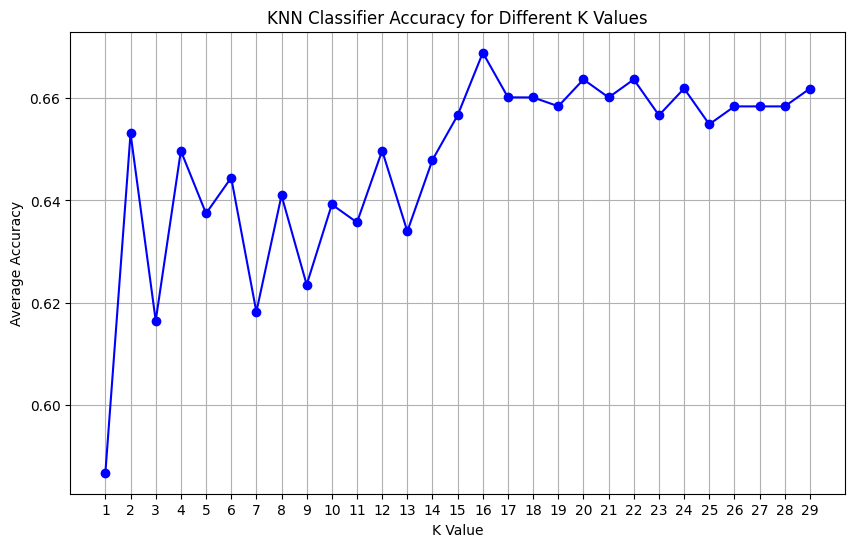

Best K value: 16


In [122]:
# Testing the range of K to find the one with the highest accuracy+
k_values = list(range(1, 30))

accuracy_scores = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier, X_train, y_train, cv=5, scoring='accuracy')
    accuracy_scores.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.xlabel('K Value')
plt.ylabel('Average Accuracy')
plt.title('KNN Classifier Accuracy for Different K Values')
plt.xticks(k_values)
plt.grid(True)
plt.show()

best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f"Best K value: {best_k}")

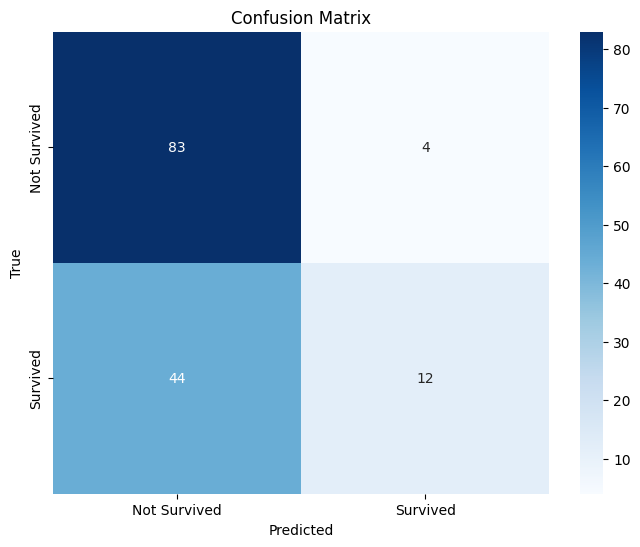

In [123]:
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
best_knn_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = best_knn_classifier.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

When checking the confusion matrix, my KNN model was not good at predicting some people who survived in the test.csv file. It had a prediction rate of 95/179 or 66% and the different K values also hover around 60-68%. Therefore, I would conclude that the KNN 5-fold model is a decent model that is slightly better then random odds for this particular dataset.